In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, plot, iplot
import sqlite3
import Code.Preparation as prep
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [35]:
WorldDf = pd.read_csv('Data/CleanedWorld.csv')
HappyDf = pd.read_csv('Data/CleanedHappy.csv')
RateDf = pd.read_csv('Data/Ratedf.csv')
CombHappy = pd.read_csv('Data/CombinedHappy.csv')
CombRate = pd.read_csv('Data/CombinedRate.csv')
SouthA = pd.read_csv('Data/SouthAmericaRate.csv')

In [37]:
RateDf.set_index('Country', inplace=True)

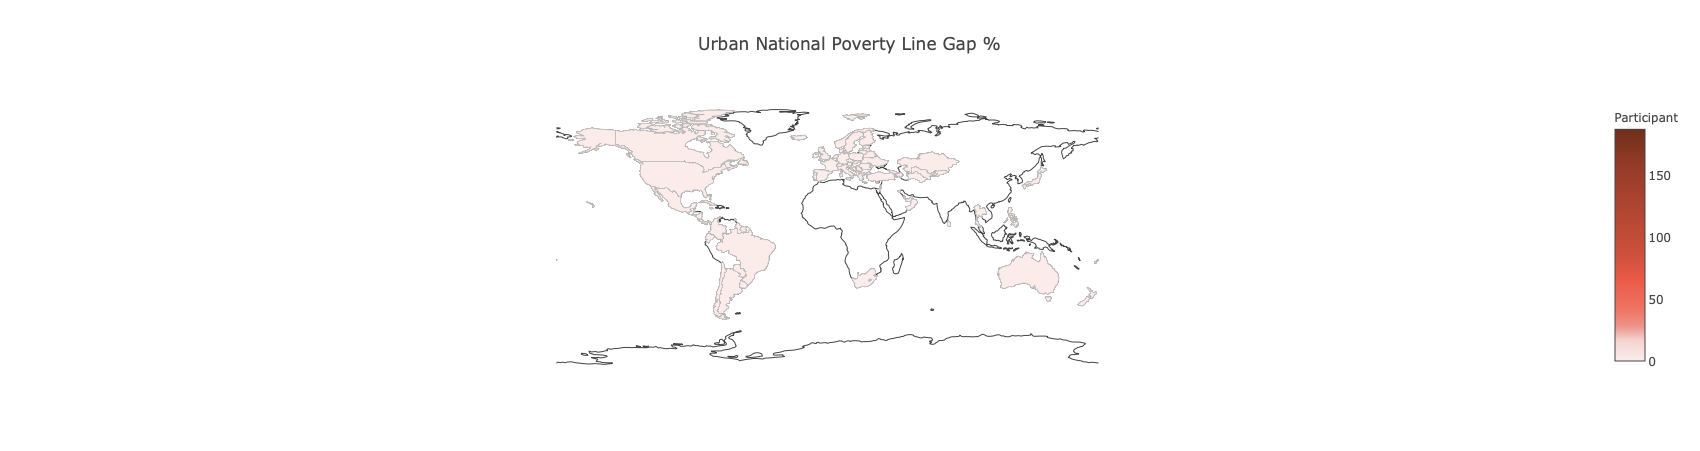

In [40]:

data = [ dict(
        type = 'choropleth',
        locations = RateDf['suicides/100k pop'].index,
        locationmode = 'country names',
        z = RateDf['suicides/100k pop'].values,
        colorscale=
            [[0.0, "rgb(251, 237, 235)"],
            [0.09, "rgb(245, 211, 206)"], 
            [0.12, "rgb(239, 179, 171)"],
            [0.15, "rgb(236, 148, 136)"],
            [0.22, "rgb(239, 117, 100)"],
            [0.35, "rgb(235, 90, 70)"],
            [0.45, "rgb(207, 81, 61)"],
            [0.65, "rgb(176, 70, 50)"],
            [0.85, "rgb(147, 59, 39)"],
            [1.00, "rgb(110, 47, 26)"]],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) 
        ),
        colorbar = dict(
            autotick = True,
            tickprefix = '',
            title = 'Participant'),
      ) ]

layout = dict(
    title = "Urban National Poverty Line Gap %",
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(type = 'Mercator'),
        width=500,height=400)
)

w_map = dict( data=data, layout=layout)
iplot( w_map, validate=False)